In [21]:
# Initialize 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.tools.visualization import plot_histogram

In [22]:
def week3_ans_func(problem_set):

    ##### build your quantum circuit here
    ##### In addition, please make it a function that can solve the problem even with different inputs (problem_set). We do validation with different inputs. 
    # Convert str input to int
    for i in range(16):
        for j in range(6):
            problem_set[i][j][0] = int(problem_set[i][j][0])
            problem_set[i][j][1] = int(problem_set[i][j][1])
            
    # define quantum and classical registers
    qram_qr = [*range(4)]
    board_qr = [*range(4, 4+16)]
    oracle_qr = [4+16]
    ancillary_qr = [*range(4+16+1, 4+16+1+2)]
    cr = [*range(4)]

    qc = QuantumCircuit(len(qram_qr)+len(board_qr) + len(oracle_qr) + len(ancillary_qr), len(cr))
    qc.h(qram_qr)
    qc.x(oracle_qr[0])
    qc.barrier()
    #### Code for Grover's algorithm with iterations = 1 will be as follows. 
    for i in range(1):
        # oracle()
        qc.x(qram_qr)
        for i in range(1,16,1): 
            pos = []
            ip = f'{i-1:04b}'
            i_bin = f"{i:04b}"
            i_xor = f'{int(ip,2)^int(i_bin,2):04b}'
            # if the board number is something do
            for x in range(len(i_xor)):
                if i_xor[x] == '1':
                    qc.x(qram_qr[-x-1])
            # encode the initial conditions 
            for coordinates in problem_set[i]: 
                pos.append(board_qr[4*coordinates[1] + coordinates[0]])
                
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
            qc.mct(qram_qr, pos[0], ancillary_qr, mode='basic')
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
        
            # # restore board number
            # for x in range(len(i_bin)):
            #     if i_bin[x] == '0':
            #         qc.x(qram_qr[-x-1])

        # qc.x(qram_qr)
        
        qc.barrier()
        qc.h(oracle_qr[0])
        for x1 in [0,1,2,3]:
            x_list = [0,1,2,3]
            x_list.remove(x1)
            for x2 in x_list:
                x_list = [0,1,2,3]
                x_list.remove(x1)
                x_list.remove(x2)
                for x3 in x_list:
                    x_list = [0,1,2,3]
                    x_list.remove(x1)
                    x_list.remove(x2)
                    x_list.remove(x3)
                    for x4 in x_list:
                        qc.mct([board_qr[x1]] + [board_qr[4 + x2]] + [board_qr[2*4 + x3]] + [board_qr[3*4 + x4]], oracle_qr[0], ancillary_qr, mode='basic')
        qc.h(oracle_qr[0])
        qc.barrier()
        qc.x(qram_qr)
        for i in range(1,16,1): 
            pos = []
            ip = f'{i-1:04b}'
            i_bin = f"{i:04b}"
            i_xor = f'{int(ip,2)^int(i_bin,2):04b}'
            # if the board number is something do
            for x in range(len(i_xor)):
                if i_xor[x] == '1':
                    qc.x(qram_qr[-x-1])
            # encode the initial conditions 
            for coordinates in problem_set[i]: 
                pos.append(board_qr[4*coordinates[1] + coordinates[0]])
                
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
            qc.mct(qram_qr, pos[0], ancillary_qr, mode='basic')
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
        
            # # restore board number
            # for x in range(len(i_bin)):
            #     if i_bin[x] == '0':
            #         qc.x(qram_qr[-x-1])

        # qc.x(qram_qr)
        qc.barrier()
        # diffusion()   
        # qc.h(qram_qr)
        # qc.x(qram_qr)
        qc.u(np.pi/2, 0, 0, qubit=qram_qr)
        qc.barrier()
        qc.h(qram_qr[3])
        qc.mct(qram_qr[0:3], qram_qr[3], ancillary_qr, mode='basic')
        qc.h(qram_qr[3])
        qc.barrier()
        qc.u(np.pi/2, np.pi, np.pi, qubit=qram_qr)
        # qc.x(qram_qr)
        # qc.h(qram_qr)
        qc.barrier()

    qc.measure(qram_qr, cr)
    qc = qc.reverse_bits()

    return qc

In [23]:
def week3_ans_func_with_permuations(problem_set):

    ##### build your quantum circuit here
    ##### In addition, please make it a function that can solve the problem even with different inputs (problem_set). We do validation with different inputs. 
    # Convert str input to int
    for i in range(16):
        for j in range(6):
            problem_set[i][j][0] = int(problem_set[i][j][0])
            problem_set[i][j][1] = int(problem_set[i][j][1])
    # rearrange the boards to put one asteroid on the at the (0,0) and if possible the rest of the rwo is empty.
    for i in range(16):
        ast = [*range(6)]
        for j in ast:
            ast = [*range(6)]
            ast.remove(j)
            for k in ast:
                problem_set[i][k][0] = (problem_set[i][k][0] - problem_set[i][j][0]) % 4
                problem_set[i][k][1] = (problem_set[i][k][1] - problem_set[i][j][1]) % 4
            problem_set[i][j][0]=0
            problem_set[i][j][1]=0
            if np.count_nonzero(np.array(problem_set)[i,:,1] == 0) == 1:
                # print(f'success{i}')
                break

    # define quantum and classical registers
    qram_qr = [*range(4)]
    board_qr = [*range(4, 4+16)]
    oracle_qr = [4+16]
    ancillary_qr = [*range(4+16+1, 4+16+1+2)]
    cr = [*range(4)]

    qc = QuantumCircuit(len(qram_qr)+len(board_qr) + len(oracle_qr) + len(ancillary_qr), len(cr))
    qc.h(qram_qr)
    qc.x(oracle_qr[0])
    qc.barrier()
    #### Code for Grover's algorithm with iterations = 1 will be as follows. 
    for i in range(1):
        # oracle()
        # qc.x(qram_qr)
        for i in range(1,16,1): 
            pos = []
            ip = f'{i-1:04b}'
            i_bin = f"{i:04b}"
            i_xor = f'{int(ip,2)^int(i_bin,2):04b}'
            # if the board number is something do
            for x in range(len(i_xor)):
                if i_xor[x] == '1':
                    qc.x(qram_qr[-x-1])
            # encode the initial conditions 
            for coordinates in problem_set[i]: 
                pos.append(board_qr[4*coordinates[1] + coordinates[0]])
                
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
            qc.mct(qram_qr, pos[0], ancillary_qr, mode='basic')
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
        
        
        qc.barrier()
        qc.h(oracle_qr[0])
        for x1 in [0]:
            x_list = [0,1,2,3]
            x_list.remove(x1)
            for x2 in x_list:
                x_list = [0,1,2,3]
                x_list.remove(x1)
                x_list.remove(x2)
                for x3 in x_list:
                    x_list = [0,1,2,3]
                    x_list.remove(x1)
                    x_list.remove(x2)
                    x_list.remove(x3)
                    for x4 in x_list:
                        qc.mct([board_qr[4 + x2]] + [board_qr[2*4 + x3]] + [board_qr[3*4 + x4]], oracle_qr[0], ancillary_qr, mode='basic')
        qc.h(oracle_qr[0])
        qc.barrier()
        qc.x(qram_qr)
        for i in range(1,16,1): 
            pos = []
            ip = f'{i-1:04b}'
            i_bin = f"{i:04b}"
            i_xor = f'{int(ip,2)^int(i_bin,2):04b}'
            # if the board number is something do
            for x in range(len(i_xor)):
                if i_xor[x] == '1':
                    qc.x(qram_qr[-x-1])
            # encode the initial conditions 
            for coordinates in problem_set[i]: 
                pos.append(board_qr[4*coordinates[1] + coordinates[0]])
                
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
            qc.mct(qram_qr, pos[0], ancillary_qr, mode='basic')
            for i in range(1,6,1):
                qc.cx(pos[0], pos[i])
        
        # qc.x(qram_qr)
        qc.barrier()
        # diffusion()   
        qc.u(np.pi/2, 0, 0, qubit=qram_qr)
        qc.barrier()
        qc.h(qram_qr[3])
        qc.mct(qram_qr[0:3], qram_qr[3], ancillary_qr, mode='basic')
        qc.h(qram_qr[3])
        qc.barrier()
        qc.u(np.pi/2, np.pi, np.pi, qubit=qram_qr)
        qc.barrier()

    qc.measure(qram_qr, cr)
    qc = qc.reverse_bits()

    return qc

In [24]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]


q1 = [[['0', '1'], ['0', '2'], ['1', '0'], ['2', '0'], ['3', '1'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '1']],
 [['0', '0'], ['0', '3'], ['2', '1'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '1'], ['0', '2'], ['1', '1'], ['2', '0'], ['3', '2']],
 [['0', '1'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '0'], ['3', '1']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['2', '0'], ['2', '1'], ['3', '0']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
 [['0', '2'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '3'], ['3', '2']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '2'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '2'], ['1', '0'], ['2', '2'], ['2', '3'], ['3', '3']],
 [['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '2'], ['3', '3']],
 [['0', '0'], ['1', '0'], ['2', '1'], ['2', '2'], ['3', '2'], ['3', '3']],
 [['0', '0'], ['1', '1'], ['1', '2'], ['2', '1'], ['2', '3'], ['3', '0']],
 [['0', '1'], ['0', '3'], ['2', '1'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['1', '3'], ['3', '0'], ['3', '1']]]
 
#  , '6']
 
q2 = [[['0', '0'], ['0', '2'], ['1', '0'], ['1', '1'], ['3', '1'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '1']],
 [['0', '0'], ['1', '0'], ['2', '1'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['1', '2'], ['3', '0'], ['3', '2']],
 [['0', '2'], ['0', '3'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
 [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '2'], ['3', '1']],
 [['0', '0'], ['1', '0'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '3']],
 [['0', '0'], ['0', '1'], ['1', '2'], ['2', '0'], ['3', '1'], ['3', '2']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2']],
 [['0', '0'], ['0', '1'], ['0', '3'], ['1', '0'], ['2', '1'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '2']],
 [['0', '1'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['1', '1'], ['2', '0'], ['2', '3'], ['3', '1'], ['3', '2']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['3', '1'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '2']]]
 
#  , '13']

q3 = [[['0', '2'], ['0', '3'], ['1', '1'], ['2', '0'], ['3', '0'], ['3', '1']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '2'], ['2', '3']],
 [['0', '2'], ['0', '3'], ['1', '0'], ['1', '1'], ['2', '3'], ['3', '1']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['2', '0'], ['2', '3'], ['3', '3']],
 [['0', '3'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '2'], ['3', '3']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['1', '0'], ['1', '1'], ['2', '1'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '3'], ['2', '0'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '1'], ['2', '0'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '3'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '0'], ['1', '1'], ['2', '0'], ['2', '2']],
 [['0', '1'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '2']],
 [['0', '2'], ['0', '3'], ['1', '3'], ['2', '0'], ['2', '2'], ['3', '0']]]
 
#  , '3']


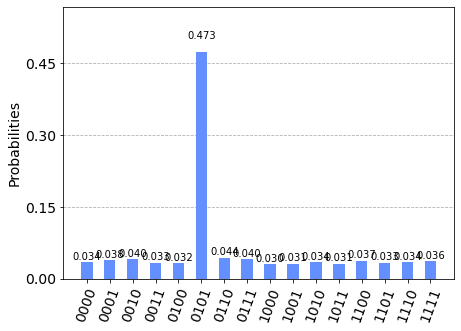

In [25]:
# IMPORTANT: Note that I needed to reverse the qubits for the grader to accept the answer.
# I here leave all the qubits reversed. The correct answer should be read in reverse.

# This is my latest submission to the grader, but not my best score. 
qc = week3_ans_func(problem_set)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts() 
plot_histogram(count)


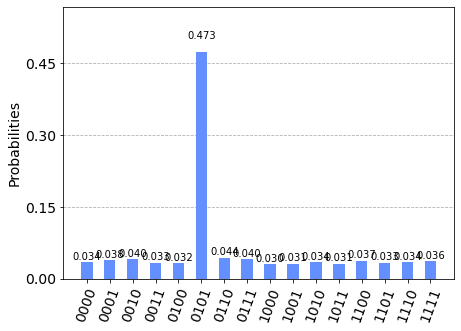

In [26]:
# IMPORTANT: Note that I needed to reverse the qubits for the grader to accept the answer.
# I here leave all the qubits reversed. The correct answer should be read in reverse.

# This is my best score to the grader but not my latest submission. 
# I needed to change this answer after one of the mentors mentioned in the Slack 
# group that we are not allowed permuations. I understand the reason behind this. 
# We need to make sure all the calculations are done by the quantum circuit and not by 
# solving the problem classically then put the answer on the quantum circuit. 
# However, I think it's a rather arbitrary line to draw. We are given the freedom
# to encode the information on the quantum circuit whichever way we like, which is a classical proccess. 
# What I mean is that the process of coupling the qRAM qubits to the qubits 
# carrying the boards configurations is a classical process, different inputs will be require different qRAM circuits. 
# Hence I also think the process of permuting the rows
# is just a special kind of encoding the classical information into the quantum circuit which is done classicaly anyway. 
# Anyway, since we can't change our best score with something higher. Here's how I got my best score. 
qc = week3_ans_func_with_permuations(problem_set)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
plot_histogram(count)